In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from darkflow.net.build import TFNet
import cv2

In [13]:
options = {"model": "cfg/yolo.cfg", "load": "darkflow_weights/yolo.weights", "threshold": 0.1, "gpu": 1.0}

In [16]:
tfnet = TFNet(options)

Parsing ./cfg/yolo.cfg
Parsing cfg/yolo.cfg
Loading darkflow_weights/yolo.weights ...
Successfully identified 203934260 bytes
Finished in 0.015984773635864258s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)


In [22]:
def boxing(original_img, predictions):
    newImage = np.copy(original_img)

    for result in predictions:
        top_x = result['topleft']['x']
        top_y = result['topleft']['y']

        btm_x = result['bottomright']['x']
        btm_y = result['bottomright']['y']

        confidence = result['confidence']
        label = result['label'] + " " + str(round(confidence, 3))

        if confidence > 0.3:
            newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
            newImage = cv2.putText(newImage, label, (top_x, top_y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.8, (0, 230, 0), 1, cv2.LINE_AA)
            
    return newImage

In [36]:
import pprint as pp

original_img = cv2.imread("./sample_img/kaufland_test2.jpg")
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
results = tfnet.return_predict(original_img)

pp.pprint(results)

[{'bottomright': {'x': 65, 'y': 528},
  'confidence': 0.12520623,
  'label': 'bottle',
  'topleft': {'x': 5, 'y': 242}},
 {'bottomright': {'x': 189, 'y': 517},
  'confidence': 0.4449966,
  'label': 'bottle',
  'topleft': {'x': 55, 'y': 251}},
 {'bottomright': {'x': 323, 'y': 421},
  'confidence': 0.20484178,
  'label': 'bottle',
  'topleft': {'x': 270, 'y': 351}},
 {'bottomright': {'x': 22, 'y': 508},
  'confidence': 0.27527496,
  'label': 'bottle',
  'topleft': {'x': 2, 'y': 394}},
 {'bottomright': {'x': 426, 'y': 534},
  'confidence': 0.45703375,
  'label': 'bottle',
  'topleft': {'x': 268, 'y': 376}},
 {'bottomright': {'x': 921, 'y': 507},
  'confidence': 0.17234458,
  'label': 'book',
  'topleft': {'x': 850, 'y': 267}},
 {'bottomright': {'x': 746, 'y': 516},
  'confidence': 0.18648957,
  'label': 'vase',
  'topleft': {'x': 543, 'y': 248}}]


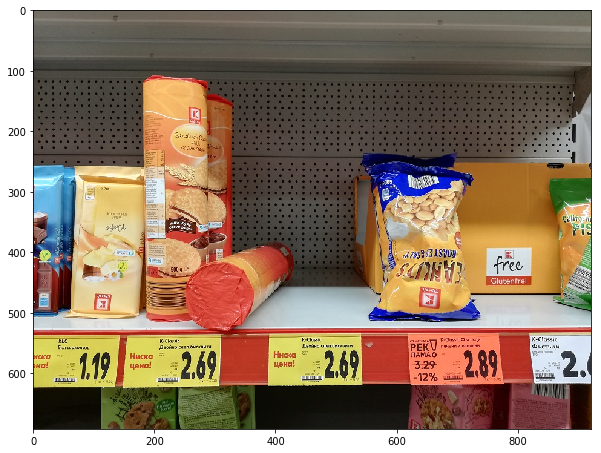

In [37]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(original_img)

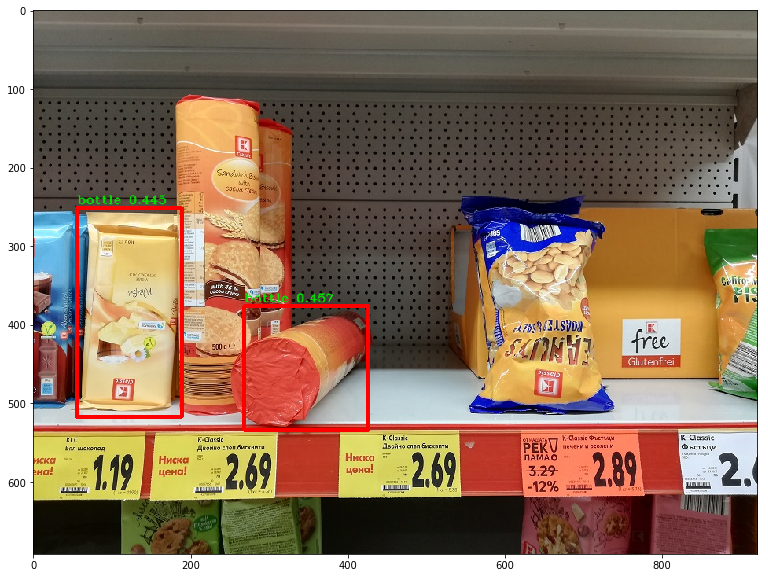

In [38]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(boxing(original_img, results))